<p style="margin: 0; padding-top: 22px; text-align:left;">M2.875 · Tipología y ciclo de vida de los datos · PRA2
</p>
<p style="margin: 0; text-align:left;">2022-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:left; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:left; padding-button: 100px; font-size:18px;">Lucas de Torre Barrio</p>

<div style="width:100%;">&nbsp;</div>


# Práctica 2: Limpieza y análisis de datos

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("winequality-red.csv")

# 1. Descripción del dataset

El dataset que vamos a estudiar es winequality-red.csv, obtenido en https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009, y contiene información sobre variantes de vinos rojos portugueses. Gracias a este dataset, podemos intenatr obtener las características más importantes de cara a que un vino rojo sea de alta calidad, lo cuál podría favorecer y abaratar este tipo de vinos de alta calidad.

Este dataset contiene las siguientes columnas: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates y alcohol. Además, tiene una última columna que es la calidad del vino (entre 0 y 10).

# 2. Integración y selección de los datos de interés a analizar

Comenzamos observando algunas características del dataset:

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Se observa que todos los campos pueden resultar importantes en la calidad del vino. Sin embargo, de todas las columnas, se observa que la densidad toma siempre valores muy similares, por lo que vamos a eliminar esa columna ya que es muy probable que no aporte demasiado de cara a un estudio posterior.

In [4]:
df = df.drop(['density'], axis=1)

# 3. Limpieza de datos

## 3.1. Elementos nulos o vacíos

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Se observa que no hay valores vacíos. Además, en este dataset, en caso de haber valores nulos (ceros), se corresponden con el valor de la columna, no con la ausencia del dato.

Por tanto, nos encontramos con que el dataset no tiene valores nulos o vacíos.

## 3.1. Valores extremos

In [6]:
def find_outliers_IQR(df, name):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    print(name + ': Num outliers = ' + str(len(outliers)) + '; Min outlier = ' + str(outliers.min()) + '; Max outlier = ' + str(outliers.max()))          
    return outliers

In [7]:
for col in df.columns:
    find_outliers_IQR(df[col], str(col))

fixed acidity: Num outliers = 49; Min outlier = 12.4; Max outlier = 15.9
volatile acidity: Num outliers = 19; Min outlier = 1.02; Max outlier = 1.58
citric acid: Num outliers = 1; Min outlier = 1.0; Max outlier = 1.0
residual sugar: Num outliers = 155; Min outlier = 3.7; Max outlier = 15.5
chlorides: Num outliers = 112; Min outlier = 0.012; Max outlier = 0.611
free sulfur dioxide: Num outliers = 30; Min outlier = 43.0; Max outlier = 72.0
total sulfur dioxide: Num outliers = 55; Min outlier = 124.0; Max outlier = 289.0
pH: Num outliers = 35; Min outlier = 2.74; Max outlier = 4.01
sulphates: Num outliers = 59; Min outlier = 1.0; Max outlier = 2.0
alcohol: Num outliers = 13; Min outlier = 13.566666666666698; Max outlier = 14.9
quality: Num outliers = 28; Min outlier = 3; Max outlier = 8


Vemos que hay campos con menos outliers (como citric acid, que solo tiene 1 outlier) y otros con una mayor cantidad (residual sugar tiene 155, casi un 10 por ciento).

A continuación lo observamos gráficamente:

C:\Users\lucto\AppData\Local\Temp/ipykernel_25568/1847331964.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


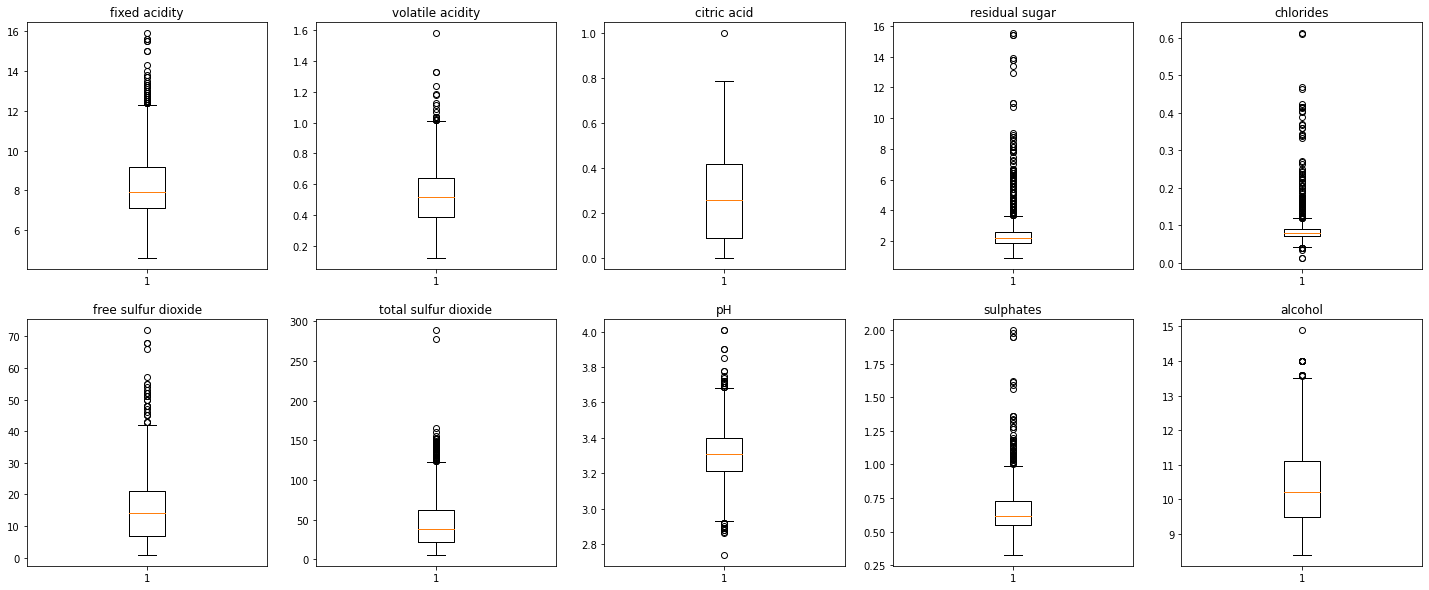

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25,10))
for i in range(2):
    for j in range(5):
        ax[i][j].boxplot(df[df.columns[5*i + j]])
        ax[i][j].set_title(df.columns[5*i + j])
fig.show()

Procedemos a eliminar los registros que contienen outliers para que no interfieran en el estudio:

In [9]:
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]   
   return not_outliers

In [10]:
for col in df.columns:
    df[col] = drop_outliers_IQR(df[col])
df = df.dropna().reset_index()
df = df.drop(['index'], axis=1)

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.00000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,8.154861,0.523030,0.246145,2.183221,0.07852,15.010144,42.187658,3.325013,0.630913,10.358819,5.624683
std,1.461065,0.164188,0.179567,0.441904,0.01434,8.795759,26.103762,0.131690,0.116071,0.972622,0.720359
min,5.100000,0.120000,0.000000,1.200000,0.04100,1.000000,6.000000,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.06900,8.000000,22.000000,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.07800,13.000000,36.000000,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.08700,20.000000,56.000000,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.11900,42.000000,122.000000,3.680000,0.980000,13.500000,7.000000


# 4. Análisis de los datos

## 4.1. Selección de los grupos de datos

Vamos ahora a crear los grupos que queremos comparar:

In [12]:
# Agrupación por cantidad de alcohol
df_poco_alcohol = df[df["alcohol"] < 10]
df_mucho_alcohol = df[df["alcohol"] >= 10]

## 4.2. Normalidad y homogeneidad de la varianza

Comenzamos estudiando la normalidad de todas las columnas. para ello, usaremos el test de D'Agostino. Según este test, rechazaremos la hipóteis de normalidad si el p-valor no es alto:

In [13]:
def test_normalidad(df, name):
    k2, p_value = stats.normaltest(df)
    print(name + ': p-valor = ' + str(p_value))          
    return k2, p_value

In [14]:
for col in df.columns:
    test_normalidad(df[col], str(col))

fixed acidity: p-valor = 1.0373021988954968e-19
volatile acidity: p-valor = 0.00017750096958336746
citric acid: p-valor = 8.367898713244399e-40
residual sugar: p-valor = 1.1446552350879099e-15
chlorides: p-valor = 0.003588635272551119
free sulfur dioxide: p-valor = 6.89525104710122e-24
total sulfur dioxide: p-valor = 9.734248826747923e-32
pH: p-valor = 0.21758189120499988
sulphates: p-valor = 2.8234951224625945e-15
alcohol: p-valor = 2.498243247903692e-22
quality: p-valor = 1.2343527241776946e-07


Como en todos los casos el p-valor es bajo, se observa que ninguna de las columnas sigue una distribución normal, salvo en el caso del pH. Observamos ahora los histogramas de cada variable para comprobar gráficamente la no normalidad de las variables salvo el pH:

C:\Users\lucto\AppData\Local\Temp/ipykernel_25568/1541766106.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


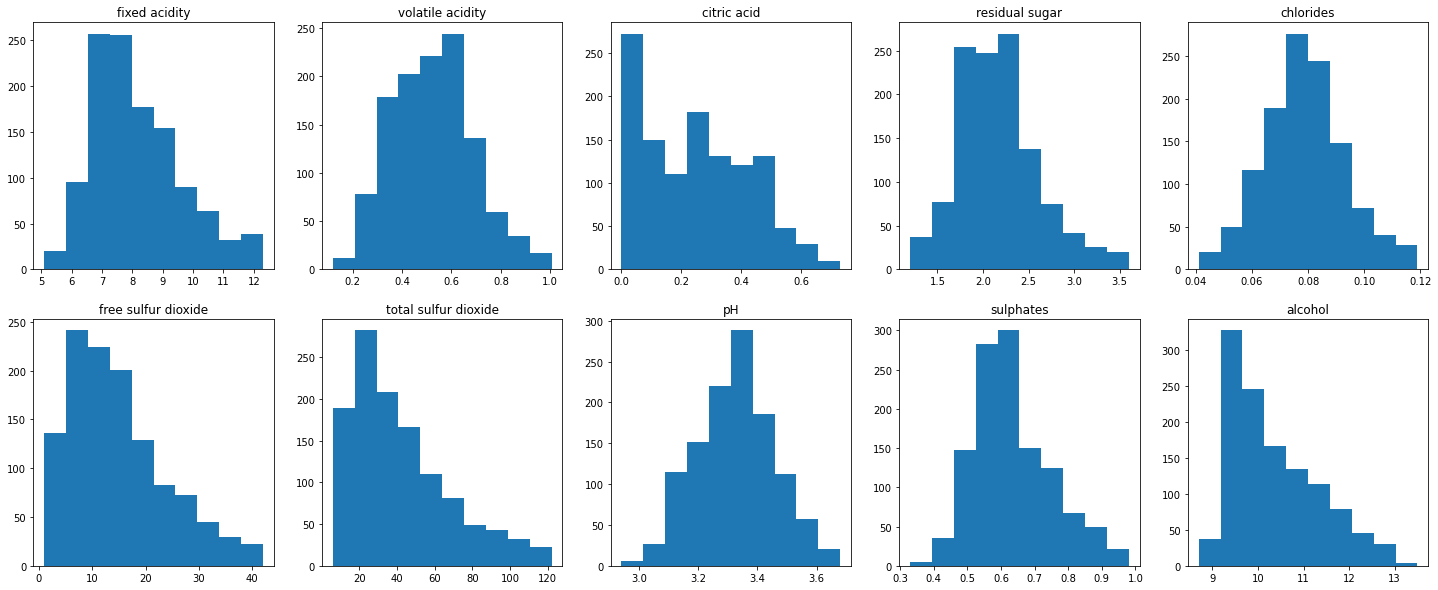

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25,10))
for i in range(2):
    for j in range(5):
        ax[i][j].hist(df[df.columns[5*i + j]])
        ax[i][j].set_title(df.columns[5*i + j])
fig.show()

Veamos si los datasets de df_poco_alcohol y df_mucho_alcohol presentan homogeneidad en sus varianzas mediante el test de Fligner-Killeen. En caso de obtener un alto p-valor, podremos asumir homogeneidad en las varianzas,

In [16]:
stats.fligner(df_poco_alcohol['alcohol'], df_mucho_alcohol['alcohol'])

FlignerResult(statistic=336.9850978831471, pvalue=2.893817413166203e-75)

Vemos que no podemos asunir homogeneidad de las varianzas por el bajo valor de p. Esto tiene sentido, ya que la varianza en el primer dataframe es mucho menor que en el segundo:

In [17]:
print(str(np.var(df_poco_alcohol['alcohol'])))
print(str(np.var(df_mucho_alcohol['alcohol'])))

0.057402524613461264
0.6280371921487059


## 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos

Vamos a estudiar la corelación de las variables con la variable quality:

In [18]:
df.corr(method='pearson')[-1:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
quality,0.110413,-0.34642,0.209742,0.005315,-0.192563,-0.004206,-0.204562,-0.058632,0.411164,0.491414,1.0


Vemos que la correlación más alta en valor absoluto la tiene el alcohol. Veamos ahora en los grupos que hemos creado, qué correlación tienen el alcohol y la calidad.

In [19]:
df_poco_alcohol.corr(method='pearson')[-1:]['alcohol']

quality    0.062209
Name: alcohol, dtype: float64

In [20]:
df_mucho_alcohol.corr(method='pearson')[-1:]['alcohol']

quality    0.367707
Name: alcohol, dtype: float64

Llama mucho la atención como, en el grupo de mucho alcohol, el alcohol tiene mucha más correlación con la calidad que en el grupo de poco alcohol.

Procedemos ahora a crear dos modelos de regresión, uno usando solo el alcohol y otro usando volatile acidity, la segunda variable con mayor correlación:

In [21]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
                                        np.array(df['alcohol']).reshape(-1,1),
                                        np.array(df['quality']).reshape(-1,1),
                                        train_size   = 0.8, random_state = 1234, shuffle = True)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
                                        np.array(df['volatile acidity']).reshape(-1,1),
                                        np.array(df['quality']).reshape(-1,1),
                                        train_size   = 0.8, random_state = 1234, shuffle = True) 
regr_1 = LinearRegression()
regr_2 = LinearRegression() 
regr_1.fit(X_train_1, y_train_1)
regr_2.fit(X_train_2, y_train_2)

print("Coeficiente de determinación R^2:", regr_1.score(X_test_1, y_test_1))
print("Coeficiente de determinación R^2:", regr_2.score(X_test_2, y_test_2))

Coeficiente de determinación R^2: 0.18750855701445945
Coeficiente de determinación R^2: 0.05727990452006937


Observamos que es mejor el modelo que utiliza el alcohol en lugar del volatile acidity, ya que tiene un mayor coeficiente de determinación.

# 6. Resolución del problema

Hemos visto que la variable que más influye en la calidad del vino es el alcohol. Además, también hemos comprobado que esta variable es más influyente en el caso de que la cantidad de alcohol sea superior a 10.

Sin embargo, hemos comprobado que no es suficiente para poder determinar la calidad del vino. Probablemente, una combinación más compleja incluyendo alguno de los ácidos o sulfuros permitiría conseguir un modelo más preciso de cara a saber la calidad de un vino en base a sus componentes.